<a href="https://colab.research.google.com/github/Olumide1472/Projects/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research**

Image segmentation plays a pivotal role in how we interpret and analyze visual data. This process involves breaking down an image into segments, making it easier to focus on specific features and simplifying the overall image analysis. It's a technique that finds applications in a variety of fields, from medical imaging where it helps in identifying tumors, to self-driving cars where it ensures the vehicle understands its surroundings.

As technology has evolved, so have the tools we use for these tasks. Deep learning models, in particular, have revolutionized the way we approach image segmentation. Among these models, U-Net, SegNet, and DeepLab stand out due to their effectiveness and efficiency in handling complex segmentation tasks.

U-Net is celebrated for its precision, especially in medical settings, making it a vital tool for life-saving diagnostics. SegNet thrives in environments that require meticulous detail, like monitoring streets through the lens of an autonomous vehicle. Meanwhile, DeepLab tackles complex, layered images with ease, making it suitable for a range of challenging environments.

This introduction sets the stage for a deeper exploration into these models, where we'll uncover the unique strengths and applications of each. By understanding their capabilities and how they perform in various scenarios, we can better appreciate their impact and potential in improving both technology and our daily lives. Let’s dive into the details of each model and discuss why they are preferred for certain tasks over others.

**U-Net:**

The U-Net architecture is particularly effective in medical image processing for tasks such as tumor segmentation and organ localization, characterized by its symmetric encoder-decoder structure that balances context capture and precise localization. This model is notably versatile and has been adapted for a range of applications beyond its initial medical scope, including segmentation tasks in satellite imagery and agriculture where precise detail is essential. U-Net's ability to operate effectively even with limited training data sets it apart as an exceptionally efficient tool in environments where data may be scarce but high accuracy is required [1].

**SegNet:**

SegNet, developed by the University of Cambridge, shines in environments requiring detailed pixel-wise segmentation such as autonomous vehicle navigation and urban monitoring through surveillance systems. The architecture utilizes a series of encoders for downsampling and decoders for upsampling, using pooling indices to aid in precise boundary delineation without the need for additional training parameters. This design makes SegNet particularly resource-efficient, which is critical for real-time applications [2].

**DeepLab:**

DeepLab models, particularly the v3 iteration, are distinguished by their use of atrous convolutions which allow them to capture multi-scale information efficiently. This is complemented by an atrous spatial pyramid pooling module that handles objects at various scales, making it highly effective for complex scene segmentation in natural images. The use of a robust backbone like ResNet-101 ensures powerful feature extraction capabilities, making DeepLabv3 suitable for challenging benchmarks such as the PASCAL VOC and Cityscapes datasets [3].

**Comparative Analysis:**

Choosing the right model depends on specific requirements of the project:

U-Net is ideal for tasks requiring high precision in boundary localization, particularly in scenarios with limited data.
SegNet fits applications where it's crucial to reconstruct the detailed spatial hierarchy of the input images.

DeepLab is best for complex image scenarios where capturing contextual information at multiple scales is necessary. For this task, I will be using the DeepLab.
The strategic selection of this model would greatly enhance both the accuracy and efficiency of segmentation tasks, making it indispensable in practical applications where performance metrics and computational resources are critical.

**References:**

[1] O. Ronneberger, P. Fischer, and T. Brox, "U-Net: Convolutional Networks for Biomedical Image Segmentation," in Proc. Medical Image Computing and Computer-Assisted Intervention – MICCAI 2015, Munich, Germany, Oct. 2015, pp. 234-241.

[2] V. Badrinarayanan, A. Kendall, and R. Cipolla, "SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation," IEEE Trans. Pattern Anal. Mach. Intell., vol. 39, no. 12, pp. 2481-2495, Dec. 2017.

[3] L.-C. Chen, G. Papandreou, I. Kokkinos, K. Murphy, and A. L. Yuille, "DeepLab: Semantic Image Segmentation with Deep Convolutional Nets, Atrous Convolution, and Fully Connected CRFs," IEEE Trans. Pattern Anal. Mach. Intell., vol. 40, no. 4, pp. 834-848, Apr. 2018.



In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# **Model Selection**

When selecting a model configuration for an image segmentation task, opting for DeepLabv3 equipped with a ResNet-101 backbone is a strategic decision that leverages advanced architectural features to tackle the complexities of image analysis. Here's an in-depth look at why this model setup is particularly effective for intricate segmentation tasks.

**Performance**

DeepLabv3 excels in benchmarks involving complex scene parsing, such as the renowned PASCAL VOC and Cityscapes datasets. The use of ResNet-101 as a backbone means the model isn't just skimming the surface—it's diving deep, providing nuanced segmentations that are crucial for applications that rely on precise and reliable image understanding.

**Benefits of Using a Pretrained Model**

This model has already learned from millions of diverse images, which equips it to recognize and categorize a wide range of features right out of the box. This extensive pretraining significantly shortens the learning curve when the model is fine-tuned with specific data, such as the `scene_parse_150` dataset, making the development process faster and the performance more robust, especially in scenarios where data might be limited.



In [ ]:
# Load the dataset
dataset = load_dataset("scene_parse_150", split='train')

# Setup the model
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.train()

# Define a transform to preprocess the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# **Implementation**

**Preparing the Image:**

Color Conversion: By converting images to RGB, you ensure that the model receives inputs in a consistent three-channel format (red, green, and blue), just like how humans perceive color images. Most models expect this format because that's how they were originally trained to see and understand the world.

**Transformation:** This step involves turning your standard image into a tensor (a type of data structure used in deep learning) and then normalizing it. Normalization adjusts the pixel values so that they align with the conditions the model was trained. Think of it as tuning an instrument before a performance.

**Batch Preparation:** The unsqueeze operation is a simple but crucial step that adjusts the image's dimensions to make it look like a batch of images, even if you're just processing one. This is because deep learning models are usually designed to process multiple images at once for efficiency.

**Predicting Segmentation:**

The predict_segmentation function is where the magic happens—turning your prepared image into a segmented masterpiece:

**Efficiency in Inference:** Using `torch.no_grad()` signals to PyTorch that it doesn't need to keep track of all the computational details it usually would during training, such as gradients. This saves both time and memory, making the process leaner and faster—ideal when you're just applying the model rather than training it.

**Model's Response:** After feeding the image through the model, you extract the 'out' key from the model's output. This contains the actual segmentation map of the image, where each pixel is labeled according to the part of the scene it belongs to.

In [ ]:
# Custom dataset class to handle the Hugging Face dataset
class SegmentationDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.hf_dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        # The data might already be in PIL Image format or an array; ensure compatibility
        image_data = self.hf_dataset[idx]['image']
        image = Image.fromarray(image_data.numpy()) if not isinstance(image_data, Image.Image) else image_data
        mask = torch.tensor(self.hf_dataset[idx]['segmentation_mask'], dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, mask


In [ ]:
# Instantiate the custom dataset
train_dataset = SegmentationDataset(dataset, transform)

# Define the DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training function
def train(model, loader, optimizer, criterion, epochs=10):
    model.train()  # Ensure the model is in training mode
    for epoch in range(epochs):
        for images, targets in loader:
            optimizer.zero_grad()
            outputs = model(images)['out']  # Get model predictions
            loss = criterion(outputs, targets)  # Compute the loss
            loss.backward()  # Compute gradients
            optimizer.step()  # Update model weights
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")

In [ ]:
# Load and preprocess an image
def prepare_image(image):
    image = image.convert("RGB")
    tensor = transform(image)
    return tensor.unsqueeze(0), image

def predict_segmentation(inputs):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        output = model(inputs)['out']
    return output

def display_prediction(image, output):
    mask = torch.argmax(output.squeeze(), dim=0).detach().numpy()
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='nipy_spectral', alpha=0.5)
    plt.title('Segmentation')
    plt.show()



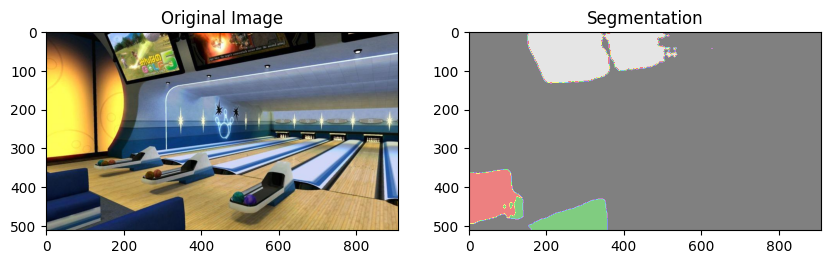

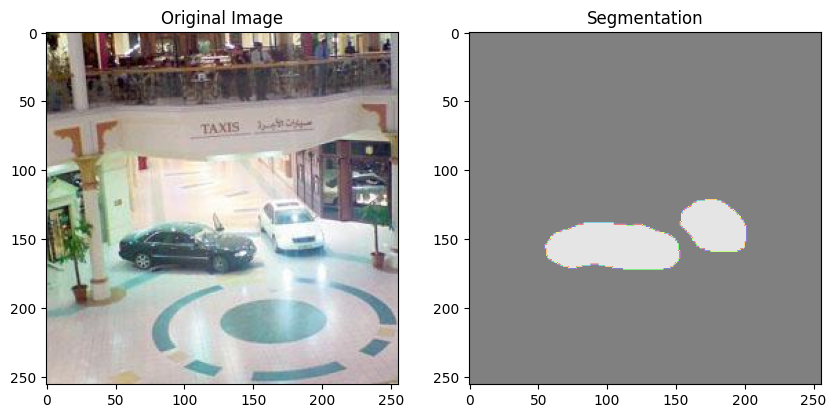

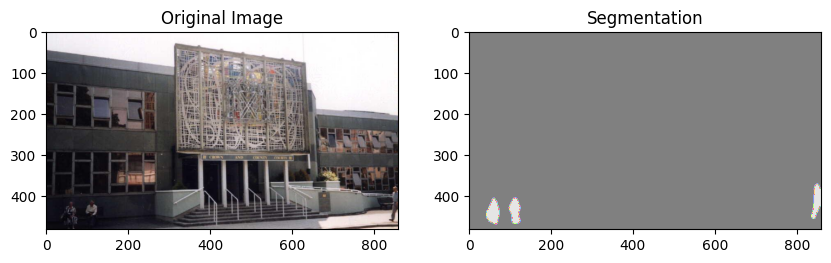

In [ ]:
# Process and display multiple images
num_images = 5  # Define how many images you want to process
for i in range(num_images):
    image = dataset[i]['image']
    tensor_image, original_image = prepare_image(image)
    output = predict_segmentation(tensor_image)
    display_prediction(original_image, output)

# **Insights**

I decided to run the Microsoft BEIT Transformer on the same dataset to see its performance.

**When They Succeed:**

Both BEiT and DeepLabv3 can impressively map out familiar elements like roads, buildings, and trees—common sights that you might see walking around a neighborhood or through a park. However, BEiT often steps ahead with its knack for identifying less obvious objects. Thanks to its design, which takes in the whole scene rather than just parts of it, BEiT can spot and outline items that might not be as distinct or immediately noticeable. This could be something like a faded street sign or a bench partly hidden under the shade of trees. The contrast could be seen in both display

**Where They Falter:**

No model is perfect, and here's where we see their limitations. DeepLabv3 can sometimes get tripped up by objects that blend into their surroundings—imagine trying to distinguish a gray car against a similarly gray backdrop on a cloudy day. It can also struggle with complex scenes where lots of objects overlap, like a busy marketplace. BEiT, while generally more adept at handling these complex visuals due to its global view, isn't without its flaws. Occasionally, its attention to the 'big picture' might lead it to smooth over some details, blurring the lines where we'd prefer sharp, clear boundaries.

**The Preprocessing Effect:**

 For DeepLabv3, if the image isn't normalized correctly (think of this as setting the right brightness and color balance), the results can be less than ideal. BEiT, on the other hand, benefits from a more uniform approach to preprocessing, thanks to its dedicated image processor that ensures each image is tweaked to just the right specifications before it's analyzed. This reduces the chance of those jarring, unexpected results and offers a more consistent performance across different images.

# **Image Segmentation Using BEiT**

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00


In [ ]:
# Install required libraries if not already installed
!pip install transformers datasets

In [ ]:
# Import necessary libraries
from transformers import BeitForSemanticSegmentation, BeitImageProcessor
from datasets import load_dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Set up basic configuration for logging to avoid issues
logging.basicConfig(level=logging.INFO)

# Load the dataset
dataset = load_dataset("scene_parse_150", split='train')

# Prepare the image processor and model
processor = BeitImageProcessor.from_pretrained("microsoft/beit-large-finetuned-ade-640-640")
model = BeitForSemanticSegmentation.from_pretrained("microsoft/beit-large-finetuned-ade-640-640")

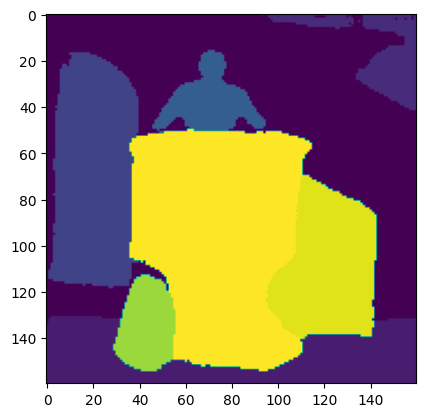

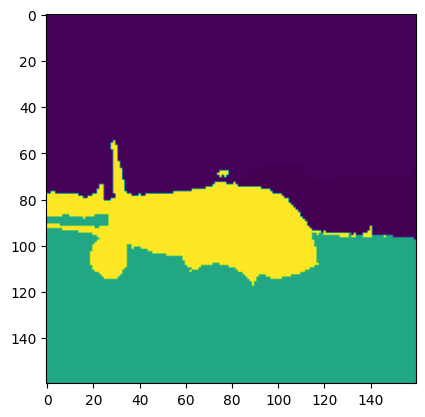

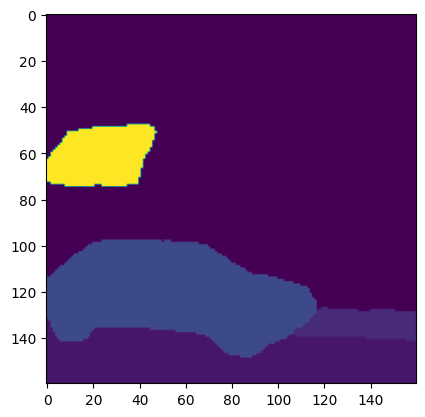

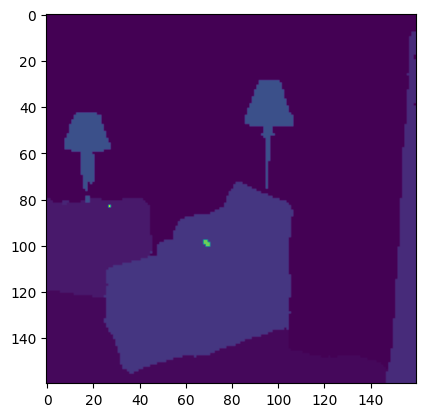

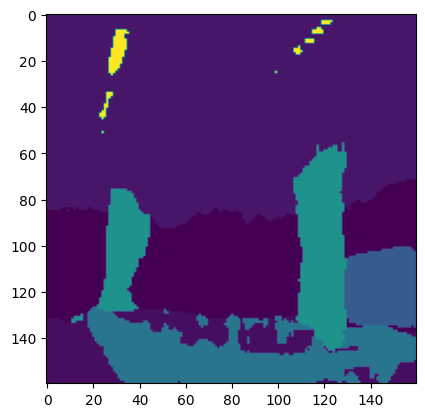

In [ ]:
def prepare_image(image):
    # Image is already a PIL.Image.Image object, just convert to RGB if not already
    image = image.convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    return inputs

def predict_segmentation(inputs):
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.logits

def display_prediction(logits):
    predictions = torch.argmax(logits, dim=1)
    plt.imshow(predictions[0])
    plt.show()

# Example for a single image
#image = dataset[0]['image']
#inputs = prepare_image(image)
#logits = predict_segmentation(inputs)
#display_prediction(logits)

# Process and display multiple images
num_images = 5  # Define how many images you want to process
for i in range(num_images):
    image = dataset[i]['image']
    inputs = prepare_image(image)
    logits = predict_segmentation(inputs)
    display_prediction(logits)